# Chapter 3: Convolution and Frequency Domain Filtering

## Frequency domain Gaussian blur filter with scipy (Gaussian)

### Áp dụng thuật toán Fast Fourier Transform (FFT)
fftconvolve sử dụng **Fast Fourier Transform (FFT)** để tăng tốc độ tính toán phép tích chập (convolution). Trong không gian Fourier, convolution trong miền không gian (spatial domain) tương đương với phép nhân trong miền tần số (frequency domain). Cụ thể:

1.  **Chuyển ảnh và kernel sang miền Fourier** bằng FFT.
    
2.  **Nhân trực tiếp hai tín hiệu trong miền Fourier**.
    
3.  **Chuyển kết quả ngược lại về miền không gian** bằng phép biến đổi ngược (Inverse FFT).



## 1. Các thư viện cần thiết

In [8]:
from PIL import Image
from skimage.io import imread
from scipy.signal import fftconvolve
from scipy.signal.windows import gaussian
import matplotlib.pyplot as plt
import numpy as np

# Đọc ảnh và chuyển sang grayscale bằng cách lấy trung bình các kênh màu
im = np.mean(imread('../images/mandrill.jpg'), axis=2)


gauss_kernel = np.outer(gaussian(11, std=3), gaussian(11, std=3))
- `gaussian(11, std=3)`: Tạo một vector Gaussian 1D dài 11, với độ lệch chuẩn (σ = 3).
- `np.outer(...)`: Tạo ma trận Gaussian 2D bằng tích ngoài (outer product) của hai vector G

####Áp dụng Gaussian Blur
im_blurred = fftconvolve(im, gauss_kernel, mode='same')
- `fftconvolve`:
  1. Chuyển đổi ảnh và kernel sang miền Fourier.
  2. Thực hiện nhân trong miền Fourier.
  3. Chuyển ngược về không gian.
- `mode='same'`: Kết quả giữ nguyên kích thước như ảnh gốc

In [10]:

# Tạo kernel Gaussian
gauss_kernel = np.outer(gaussian(11, std=3), gaussian(11, std=3))

# Áp dụng Gaussian blur sử dụng FFT convolution
im_blurred = fftconvolve(im, gauss_kernel, mode='same')


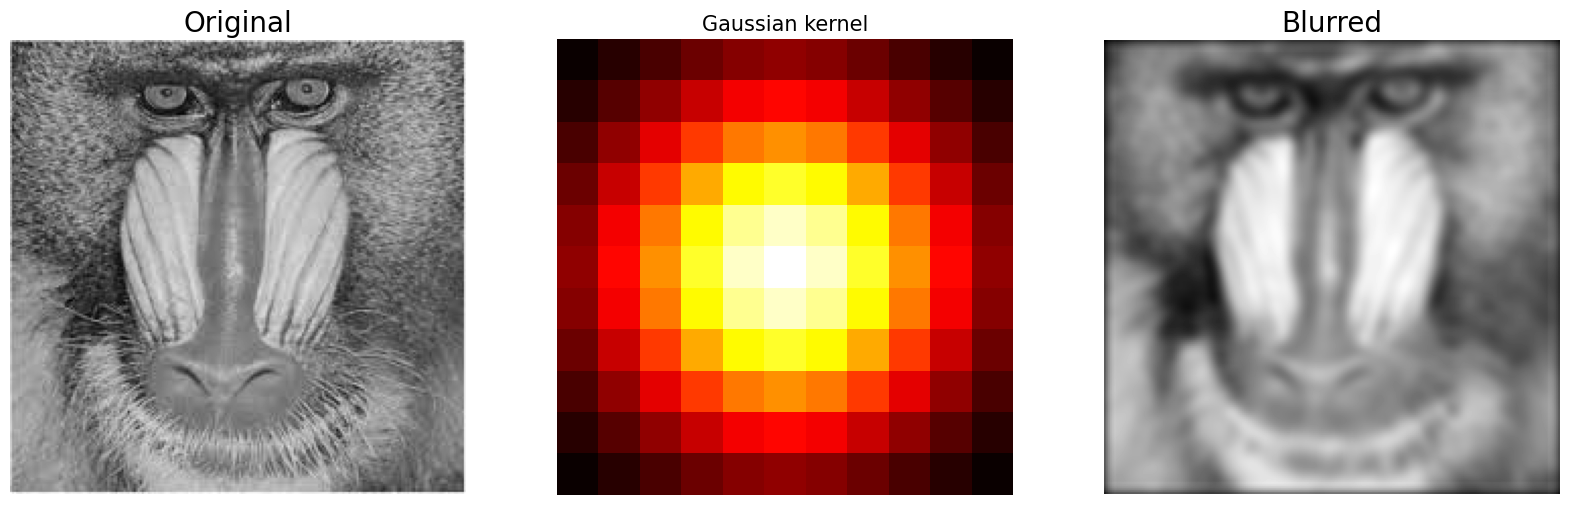

In [11]:
fig, (ax_original, ax_kernel, ax_blurred) = plt.subplots(1, 3, figsize=(20, 8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.axis('off')

ax_kernel.imshow(gauss_kernel, cmap='hot')
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.axis('off')

ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.axis('off')

plt.show()
